## Bike Sharing Assignment

## Problem Statement:

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

- **Which variables are significant in predicting the demand for shared bikes.**
- **How well those variables describe the bike demands**

In [219]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [221]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [222]:
#Build a linear model

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# evaluate
from sklearn.metrics import r2_score

In [223]:
day = pd.read_csv("day.csv")
# Check the head of the dataset
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Data Visualization

#### Perform EDA to understand various variables

In [224]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Column Details
- **instant:** record index
- **dteday :** date
- **season :** season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr :** year (0: 2018, 1:2019)
- **mnth :** month ( 1 to 12)
- **holiday :** weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday :** day of the week
- **workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit :** 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp :** temperature in Celsius
- **atemp :** feeling temperature in Celsius
- **hum :** humidity
- **windspeed :** wind speed
- **casual :** count of casual users
- **registered :** count of registered users
- **cnt :** count of total rental bikes including both casual and registered

In [225]:
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [226]:
day.instant.nunique()

730

In [227]:
day.dteday.nunique()

730

### Checking the correlation between variables

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [228]:
day.corr()

instant        season            yr          mnth   holiday  \
instant     1.000000  4.135867e-01  8.660262e-01  4.982507e-01  0.016275   
season      0.413587  1.000000e+00 -2.248195e-17  8.310321e-01 -0.010868   
yr          0.866026 -2.248195e-17  1.000000e+00 -2.470170e-17  0.008195   
mnth        0.498251  8.310321e-01 -2.470170e-17  1.000000e+00  0.018905   
holiday     0.016275 -1.086804e-02  8.195345e-03  1.890483e-02  1.000000   
weekday    -0.000023 -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962   
workingday -0.004619  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948   
weathersit -0.021862  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395   
temp        0.150738  3.333607e-01  4.878919e-02  2.190833e-01 -0.028764   
atemp       0.152773  3.420139e-01  4.721519e-02  2.264302e-01 -0.032703   
hum         0.016080  2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662   
windspeed  -0.112667 -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257   
casual      0.275604  2.087373e-01  2.505017e-01  1.212079e-01  0.054055   
registered  0.660544  4.103102e-01  5.969106e-01  2.919516e-01 -0.109142   
cnt         0.629896  4.045838e-01  5.697285e-01  2.781909e-01 -0.068764   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant    -0.000023   -0.004619   -0.021862  0.150738  0.152773  0.016080   
season     -0.003081    0.013762    0.021306  0.333361  0.342014  0.208220   
yr         -0.005466   -0.002945   -0.050322  0.048789  0.047215 -0.112547   
mnth        0.009523   -0.004688    0.045613  0.219083  0.226430  0.224937   
holiday    -0.101962   -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   
weekday     1.000000    0.035800    0.031112 -0.000168 -0.007539 -0.052290   
workingday  0.035800    1.000000    0.060236  0.053470  0.052940  0.023202   
weathersit  0.031112    0.060236    1.000000 -0.119503 -0.120559  0.590277   
temp       -0.000168    0.053470   -0.119503  1.000000  0.991696  0.128565   
atemp      -0.007539    0.052940   -0.120559  0.991696  1.000000  0.141512   
hum        -0.052290    0.023202    0.590277  0.128565  0.141512  1.000000   
windspeed   0.014283   -0.018666    0.039769 -0.158186 -0.183876 -0.248506   
casual      0.059978   -0.517607   -0.246044  0.542731  0.543362 -0.075211   
registered  0.057427    0.305437   -0.259025  0.539436  0.543678 -0.089212   
cnt         0.067534    0.062542   -0.295929  0.627044  0.630685 -0.098543   

            windspeed    casual  registered       cnt  
instant     -0.112667  0.275604    0.660544  0.629896  
season      -0.229607  0.208737    0.410310  0.404584  
yr          -0.011624  0.250502    0.596911  0.569728  
mnth        -0.208013  0.121208    0.291952  0.278191  
holiday      0.006257  0.054055   -0.109142 -0.068764  
weekday      0.014283  0.059978    0.057427  0.067534  
workingday  -0.018666 -0.517607    0.305437  0.062542  
weathersit   0.039769 -0.246044   -0.259025 -0.295929  
temp        -0.158186  0.542731    0.539436  0.627044  
atemp       -0.183876  0.543362    0.543678  0.630685  
hum         -0.248506 -0.075211   -0.089212 -0.098543  
windspeed    1.000000 -0.167995   -0.217914 -0.235132  
casual      -0.167995  1.000000    0.394137  0.672123  
registered  -0.217914  0.394137    1.000000  0.945411  
cnt         -0.235132  0.672123    0.945411  1.000000

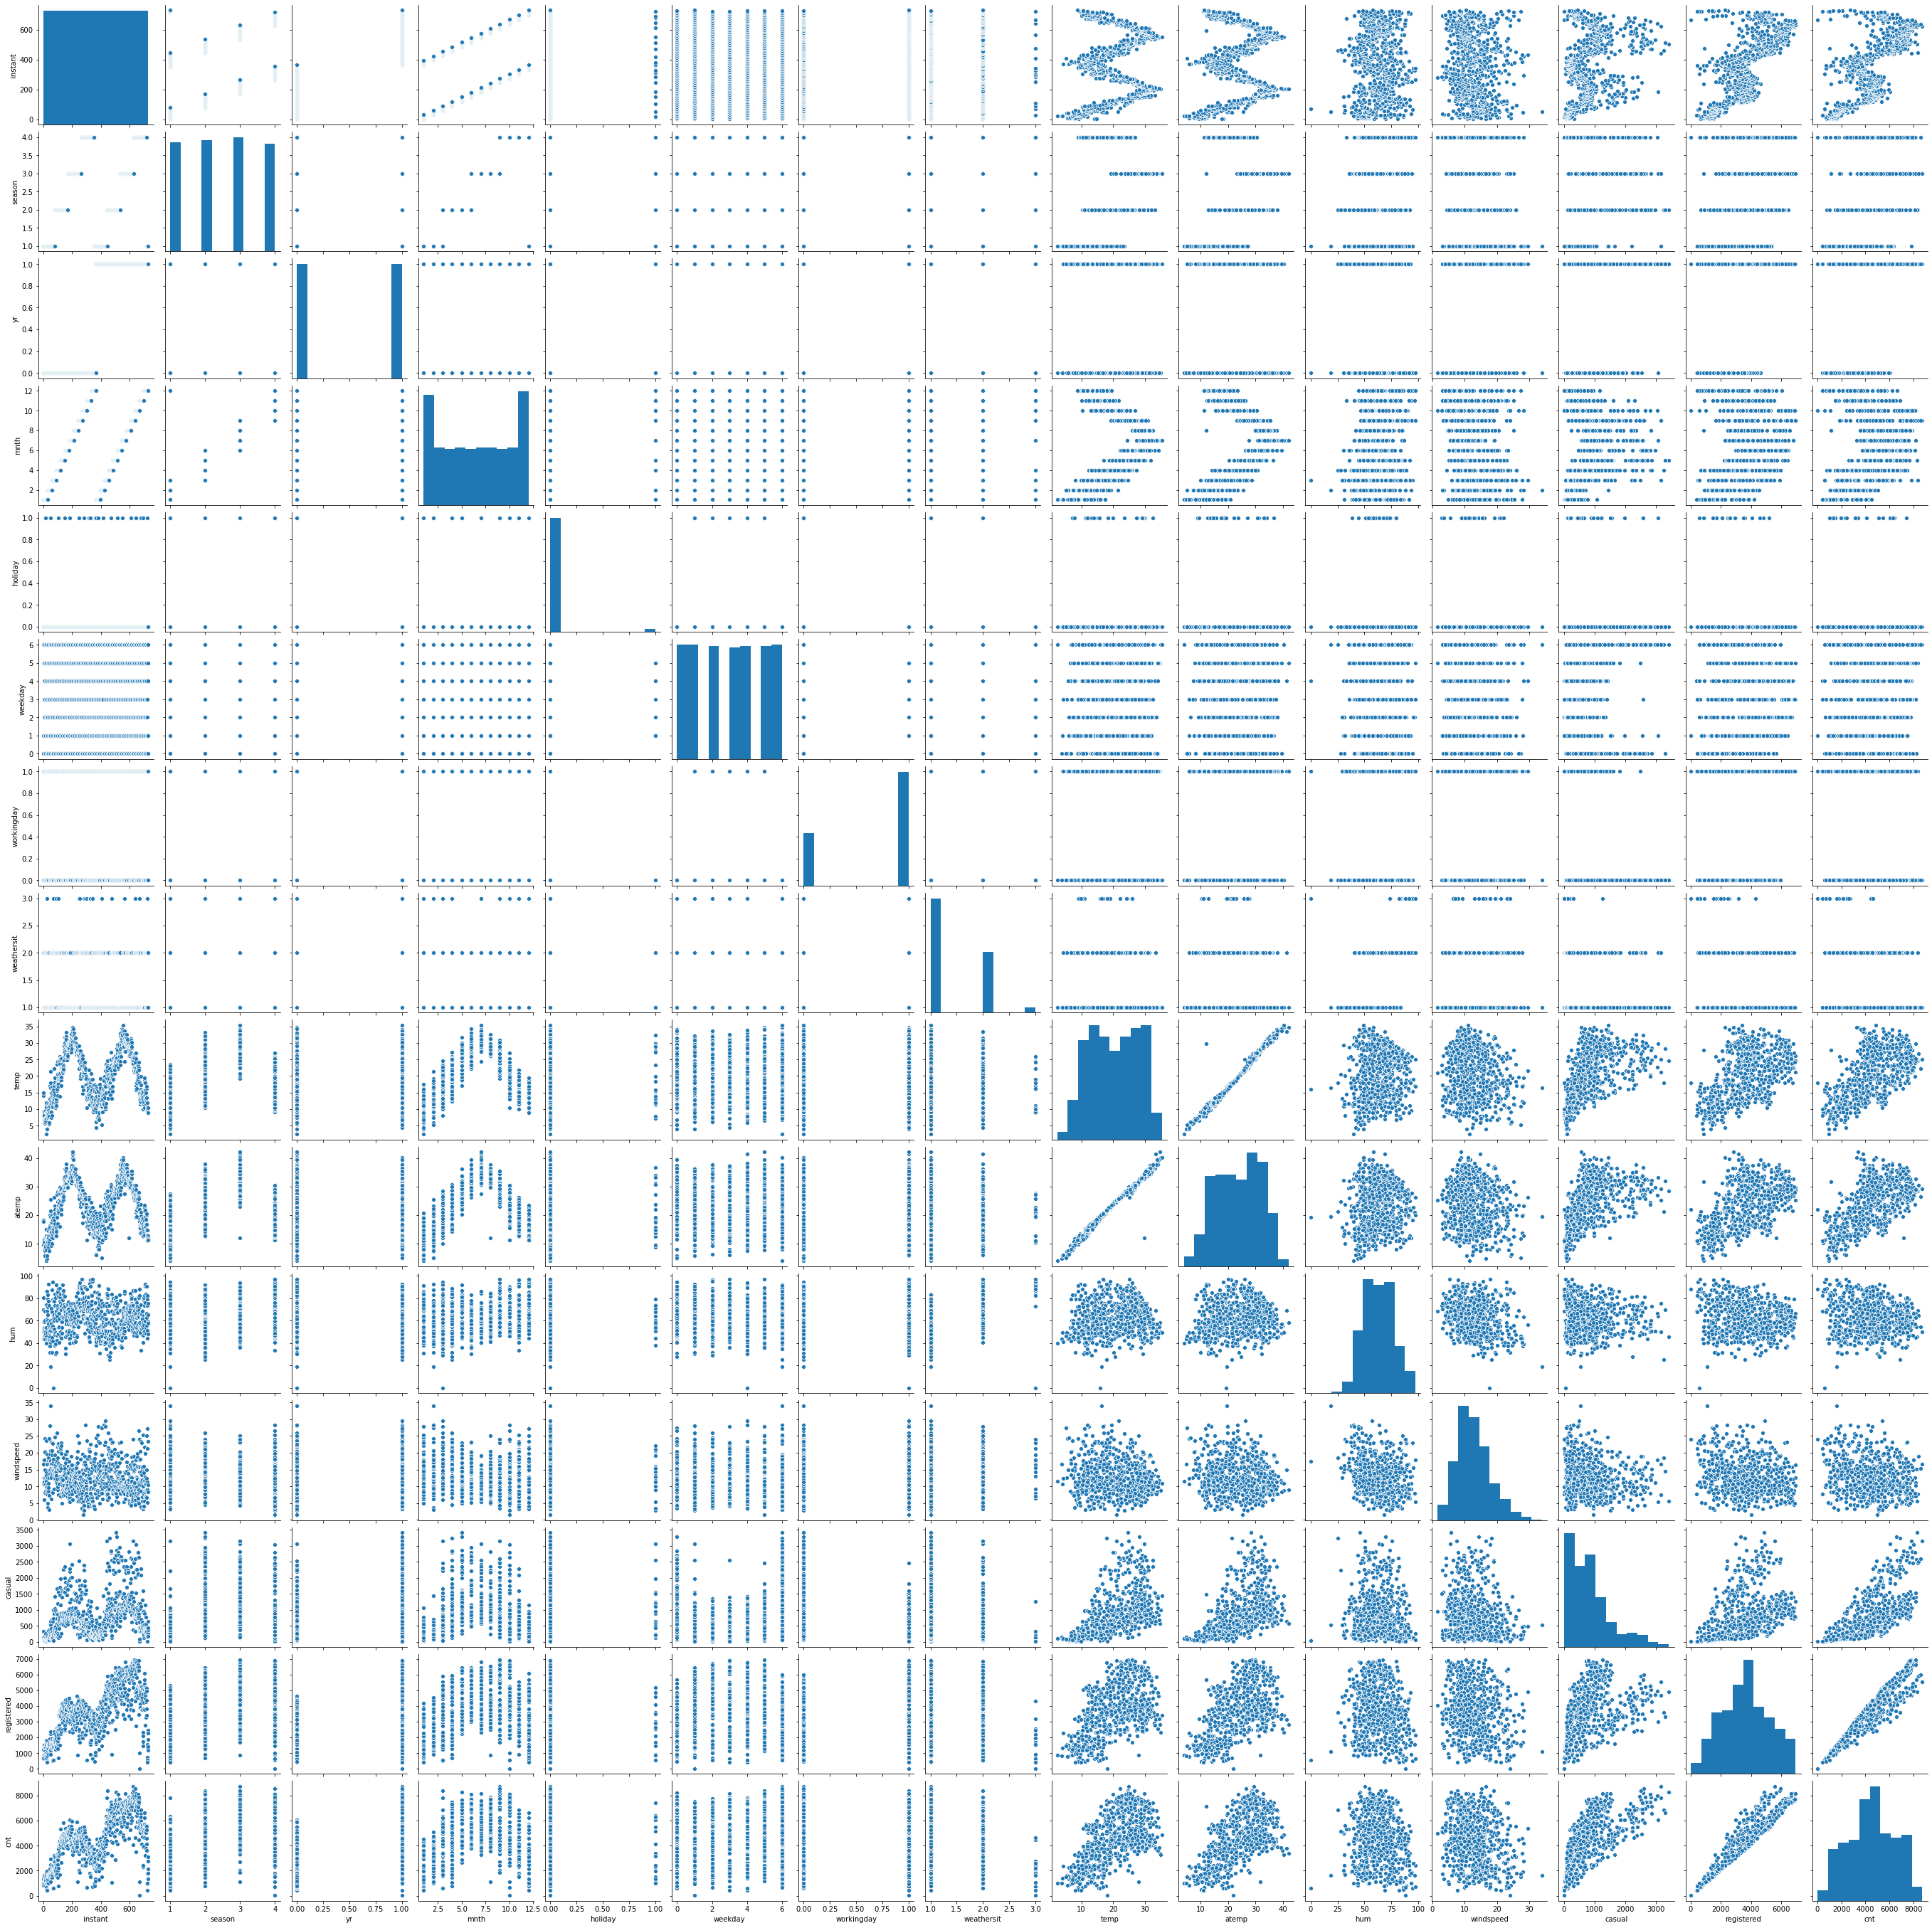

In [229]:
sns.pairplot(day)
plt.show()

In [230]:
def darwPlots(df, arr):
    size = 1 if len(arr)%3 == 1 else 0
    rows = int(len(arr)/3) + size
    height = 8 * rows
    plt.figure(figsize=(20, height))
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 3, idx)
        sns.boxplot(x = val, y = 'cnt', data = df)

    plt.tight_layout()
              

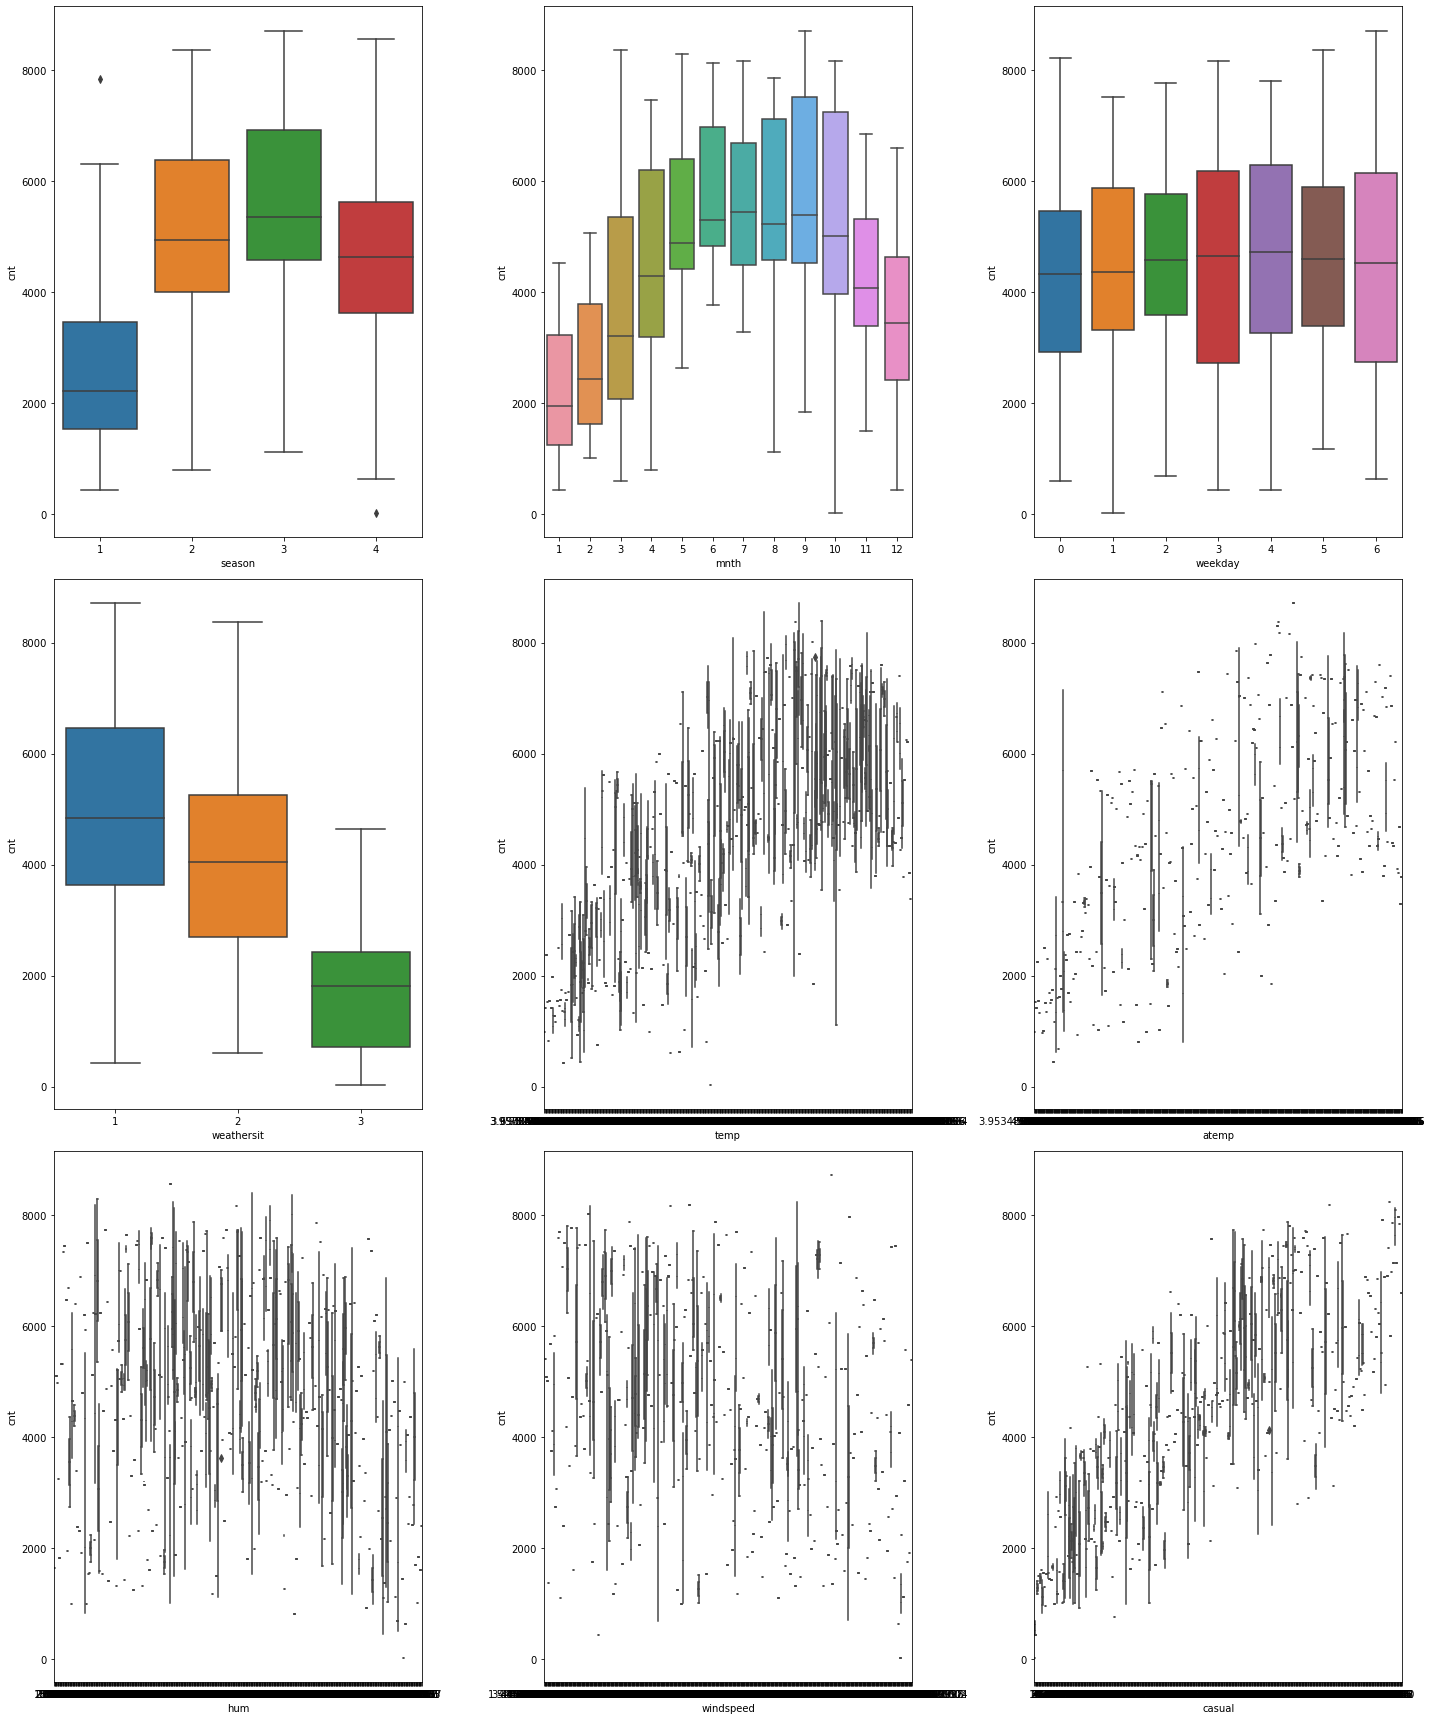

In [231]:
darwPlots(day, ['season', 'mnth', 'weekday', 'weathersit', 'temp', 'atemp', 'hum','windspeed', 'casual'])

## Business Goal:

## Data Preparation:

### checking categorical variables as per Dataset characteristics

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week
- weathersit : 
		1: Clear, Few clouds, Partly cloudy, Partly cloudy
		2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [232]:
# Categorical variables 'season' , 'mnth', 'weekday', 'weathersit' 

categorical_list =  ['season' , 'mnth', 'weekday', 'weathersit']
day[categorical_list].head()

season  mnth  weekday  weathersit
0       1     1        6           2
1       1     1        0           2
2       1     1        1           1
3       1     1        2           1
4       1     1        3           1

### convert the above numeric variables into respective category values

In [233]:
season_dict = {1:'spring', 2:'summer', 3:'fall',4:'winter'}

month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

week_of_day_dict = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

weathersit_dict = {1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4: 'Heavy Rain'}

# Applying the function to the housing list
day['season'] = day['season'].apply(lambda x : season_dict[x])
day['mnth'] = day['mnth'].apply(lambda x : month_dict[x])
day['weekday'] = day['weekday'].apply(lambda x : week_of_day_dict[x])
day['weathersit'] = day['weathersit'].apply(lambda x : weathersit_dict[x])
day[categorical_list].head()

season mnth    weekday     weathersit
0  spring  Jan   Saturday  Mist + Cloudy
1  spring  Jan     Sunday  Mist + Cloudy
2  spring  Jan     Monday          Clear
3  spring  Jan    Tuesday          Clear
4  spring  Jan  Wednesday          Clear

## Dummy Variables

Create Dummy Variables for all categorical variables

In [234]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_cagetory'
season_cagetory = pd.get_dummies(day['season'])

# Check what the dataset 'season_cagetory' looks like
season_cagetory.head()

fall  spring  summer  winter
0     0       1       0       0
1     0       1       0       0
2     0       1       0       0
3     0       1       0       0
4     0       1       0       0

In [235]:
# Let's drop the first column from 'season' df using 'drop_first = True'
season_cagetory = pd.get_dummies(day['season'], drop_first = True)

# Check what the dataset 'season_cagetory' looks like
season_cagetory.head()

spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0

In [236]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_cagetory'
mnth_cagetory = pd.get_dummies(day['mnth'])

# Check what the dataset 'mnth_cagetory' looks like
mnth_cagetory.head()

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    0    1    0    0    0    0    0    0    0

In [237]:
# Let's drop the first column from 'mnth' df using 'drop_first = True'
mnth_cagetory = pd.get_dummies(day['mnth'], drop_first = True)

# Check what the dataset 'mnth_cagetory' looks like
mnth_cagetory.head()

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0

In [238]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_cagetory'
weekday_cagetory = pd.get_dummies(day['weekday'])

# Check what the dataset 'weekday_cagetory' looks like
weekday_cagetory.head()

Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0       0         1       0         0        0          0
1       0       0         0       1         0        0          0
2       0       1         0       0         0        0          0
3       0       0         0       0         0        1          0
4       0       0         0       0         0        0          1

In [239]:
# Let's drop the first column from 'weekday' df using 'drop_first = True'
weekday_cagetory = pd.get_dummies(day['weekday'], drop_first = True)

# Check what the dataset 'weekday_cagetory' looks like
weekday_cagetory.head()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         1       0         0        0          0
1       0         0       1         0        0          0
2       1         0       0         0        0          0
3       0         0       0         0        1          0
4       0         0       0         0        0          1

In [240]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_cagetory'
weathersit_cagetory = pd.get_dummies(day['weathersit'])

# Check what the dataset 'weathersit_cagetory' looks like
weathersit_cagetory.head()

Clear  Light Snow  Mist + Cloudy
0      0           0              1
1      0           0              1
2      1           0              0
3      1           0              0
4      1           0              0

In [241]:
# Let's drop the first column from 'weathersit' df using 'drop_first = True'
weathersit_cagetory = pd.get_dummies(day['weathersit'], drop_first = True)

# Check what the dataset 'weathersit_cagetory' looks like
weathersit_cagetory.head()

Light Snow  Mist + Cloudy
0           0              1
1           0              1
2           0              0
3           0              0
4           0              0

### Merge all Categorical variables dataframes with orginal dataframe

In [242]:
# Add the results to the original day dataframe

day = pd.concat([day, season_cagetory, mnth_cagetory, weekday_cagetory, weathersit_cagetory], axis = 1)
day.head()

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0   Saturday           0   
1        2  02-01-2018  spring   0  Jan        0     Sunday           0   
2        3  03-01-2018  spring   0  Jan        0     Monday           1   
3        4  04-01-2018  spring   0  Jan        0    Tuesday           1   
4        5  05-01-2018  spring   0  Jan        0  Wednesday           1   

      weathersit       temp  ...  Oct  Sep  Monday  Saturday  Sunday  \
0  Mist + Cloudy  14.110847  ...    0    0       0         1       0   
1  Mist + Cloudy  14.902598  ...    0    0       0         0       1   
2          Clear   8.050924  ...    0    0       1         0       0   
3          Clear   8.200000  ...    0    0       0         0       0   
4          Clear   9.305237  ...    0    0       0         0       0   

   Thursday  Tuesday  Wednesday  Light Snow  Mist + Cloudy  
0         0        0          0           0              1  
1         0        0          0           0              1  
2         0        0          0           0              0  
3         0        1          0           0              0  
4         0        0          1           0              0  

[5 rows x 38 columns]

### Drop all Categorical variables

In [243]:
# Drop all Categorical variables 'season' , 'mnth', 'weekday', 'weathersit'  as we have created the dummies for it

day.drop(categorical_list, axis = 1, inplace = True)
day.head()

instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           0  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           0  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
0  10.749882     331  ...    0    0       0         1       0         0   
1  16.652113     131  ...    0    0       0         0       1         0   
2  16.636703     120  ...    0    0       1         0       0         0   
3  10.739832     108  ...    0    0       0         0       0         0   
4  12.522300      82  ...    0    0       0         0       0         0   

   Tuesday  Wednesday  Light Snow  Mist + Cloudy  
0        0          0           0              1  
1        0          0           0              1  
2        0          0           0              0  
3        1          0           0              0  
4        0          1           0              0  

[5 rows x 34 columns]

In [244]:
# Drop 'instant','dteday' unquie values

varlist =  ['instant','dteday']

day.drop(varlist, axis = 1, inplace = True)

day.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
0         654   985  ...    0    0       0         1       0         0   
1         670   801  ...    0    0       0         0       1         0   
2        1229  1349  ...    0    0       1         0       0         0   
3        1454  1562  ...    0    0       0         0       0         0   
4        1518  1600  ...    0    0       0         0       0         0   

   Tuesday  Wednesday  Light Snow  Mist + Cloudy  
0        0          0           0              1  
1        0          0           0              1  
2        0          0           0              0  
3        1          0           0              0  
4        0          1           0              0  

[5 rows x 32 columns]

#### Three columns named 'casual', 'registered', and 'cnt'
    1. 'casual' indicates the number casual users who have made a rental
    2. 'registered' on the other hand shows the total number of registered users who have made a booking on a given day
    3. 'cnt' variable indicates the total number of bike rentals, including both casual and registered

### The model should be built taking this 'cnt' as the target variable.

In [245]:
# Drop 'casual','registered' unused variables for this scenario
varlist =  ['casual','registered' , 'yr']

day.drop(varlist, axis = 1, inplace = True)

day.head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  spring  \
0        0           0  14.110847  18.18125  80.5833  10.749882   985       1   
1        0           0  14.902598  17.68695  69.6087  16.652113   801       1   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349       1   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562       1   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600       1   

   summer  winter  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  Tuesday  \
0       0       0  ...    0    0       0         1       0         0        0   
1       0       0  ...    0    0       0         0       1         0        0   
2       0       0  ...    0    0       1         0       0         0        0   
3       0       0  ...    0    0       0         0       0         0        1   
4       0       0  ...    0    0       0         0       0         0        0   

   Wednesday  Light Snow  Mist + Cloudy  
0          0           0              1  
1          0           0              1  
2          0           0              0  
3          0           0              0  
4          1           0              0  

[5 rows x 29 columns]

### Splitting the Data into Training and Testing Sets

In [246]:
# We specify this so that the train and test data set always have the same rows, respectively

day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [247]:
print(day_train.shape)
print(day_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features
For Rescaling the feature, We will use MinMax scaling.

In [248]:
scaler = MinMaxScaler()

In [249]:
# Apply scaler() to all the numeric columns 
num_vars = ['temp', 'atemp', 'hum','windspeed', 'cnt']

day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

day_train.head()

holiday  workingday      temp     atemp       hum  windspeed       cnt  \
653        0           1  0.509887  0.501133  0.575354   0.300794  0.864243   
576        0           1  0.815169  0.766351  0.725633   0.264686  0.827658   
426        0           0  0.442393  0.438975  0.640189   0.255342  0.465255   
728        0           0  0.245101  0.200348  0.498067   0.663106  0.204096   
482        0           0  0.395666  0.391735  0.504508   0.188475  0.482973   

     spring  summer  winter  ...  Oct  Sep  Monday  Saturday  Sunday  \
653       0       0       1  ...    1    0       0         0       0   
576       0       0       0  ...    0    0       0         0       0   
426       1       0       0  ...    0    0       0         1       0   
728       1       0       0  ...    0    0       0         0       1   
482       0       1       0  ...    0    0       0         1       0   

     Thursday  Tuesday  Wednesday  Light Snow  Mist + Cloudy  
653         0        1          0           0              0  
576         0        1          0           0              0  
426         0        0          0           0              1  
728         0        0          0           0              0  
482         0        0          0           0              1  

[5 rows x 29 columns]

In [250]:
day_train.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.025490    0.676471    0.537262    0.512989    0.650369    0.320768   
std      0.157763    0.468282    0.225844    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      0.000000    1.000000    0.540519    0.526811    0.653714    0.296763   
75%      0.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter  ...         Oct  \
count  510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean     0.513620    0.243137    0.245098    0.24902  ...    0.086275   
std      0.224593    0.429398    0.430568    0.43287  ...    0.281045   
min      0.000000    0.000000    0.000000    0.00000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.00000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.00000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.00000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.00000  ...    1.000000   

              Sep      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.150980    0.154902    0.143137    0.133333    0.131373   
std      0.272166    0.358381    0.362166    0.350557    0.340268    0.338139   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday  Light Snow  Mist + Cloudy  
count  510.000000  510.000000     510.000000  
mean     0.158824    0.029412       0.343137  
std      0.365870    0.169124       0.475223  
min      0.000000    0.000000       0.000000  
25%      0.000000    0.000000       0.000000  
50%      0.000000    0.000000       0.000000  
75%      0.000000    0.000000       1.000000  
max      1.000000    1.000000       1.000000  

[8 rows x 29 columns]

In [251]:
day_train.corr()

holiday  workingday      temp     atemp       hum  windspeed  \
holiday        1.000000   -0.233863 -0.066282 -0.070640 -0.029093   0.017569   
workingday    -0.233863    1.000000  0.067787  0.067811  0.031989  -0.043176   
temp          -0.066282    0.067787  1.000000  0.989537  0.155415  -0.187396   
atemp         -0.070640    0.067811  0.989537  1.000000  0.169461  -0.215283   
hum           -0.029093    0.031989  0.155415  0.169461  1.000000  -0.266895   
windspeed      0.017569   -0.043176 -0.187396 -0.215283 -0.266895   1.000000   
cnt           -0.095961    0.092320  0.643517  0.646475 -0.059993  -0.253794   
spring         0.053339   -0.037932 -0.605988 -0.610741 -0.201134   0.180743   
summer        -0.063232    0.043274  0.125582  0.135806 -0.013216   0.110089   
winter         0.050712   -0.057297 -0.233697 -0.211118  0.171579  -0.090649   
Aug           -0.052728    0.040575  0.387456  0.360025  0.053185  -0.111243   
Dec           -0.004302   -0.031500 -0.272869 -0.261862  0.057832  -0.060975   
Feb            0.056524   -0.016803 -0.296021 -0.299509 -0.129544   0.133123   
Jan            0.037412   -0.021296 -0.446724 -0.450832 -0.071652   0.006793   
Jul           -0.046539   -0.006030  0.413929  0.407105 -0.053838  -0.085478   
Jun           -0.045890    0.004694  0.302997  0.295173 -0.095033  -0.035012   
Mar           -0.053321    0.030677 -0.179694 -0.178458 -0.110761   0.142173   
May           -0.049076    0.059006  0.155415  0.161923  0.145604  -0.034137   
Nov            0.127543   -0.041271 -0.194765 -0.185697  0.004910   0.009952   
Oct           -0.005387   -0.041271 -0.018709 -0.005262  0.162014  -0.018973   
Sep            0.043692    0.019495  0.207457  0.206157  0.152628  -0.121734   
Monday         0.279279    0.174565 -0.032126 -0.025143  0.022612  -0.004372   
Saturday      -0.069242   -0.619074 -0.042274 -0.043452 -0.040521   0.049356   
Sunday        -0.066102   -0.591001 -0.017048 -0.013902  0.012224  -0.001221   
Thursday       0.009759    0.246594  0.002827  0.006332 -0.038222  -0.004353   
Tuesday       -0.062897    0.268948  0.046646  0.049470  0.010123  -0.005849   
Wednesday     -0.070276    0.300501  0.029363  0.027900  0.047185  -0.019567   
Light Snow    -0.028154    0.021159 -0.036093 -0.044266  0.245038   0.086900   
Mist + Cloudy -0.038279    0.040766 -0.090161 -0.086069  0.481042  -0.030385   

                    cnt    spring    summer    winter  ...       Oct  \
holiday       -0.095961  0.053339 -0.063232  0.050712  ... -0.005387   
workingday     0.092320 -0.037932  0.043274 -0.057297  ... -0.041271   
temp           0.643517 -0.605988  0.125582 -0.233697  ... -0.018709   
atemp          0.646475 -0.610741  0.135806 -0.211118  ... -0.005262   
hum           -0.059993 -0.201134 -0.013216  0.171579  ...  0.162014   
windspeed     -0.253794  0.180743  0.110089 -0.090649  ... -0.018973   
cnt            1.000000 -0.548871  0.134343  0.032636  ...  0.065692   
spring        -0.548871  1.000000 -0.322955 -0.326377  ... -0.174161   
summer         0.134343 -0.322955  1.000000 -0.328116  ... -0.175089   
winter         0.032636 -0.326377 -0.328116  1.000000  ...  0.533619   
Aug            0.227229 -0.184784 -0.185769 -0.187737  ... -0.100180   
Dec           -0.143598  0.041868 -0.172902  0.314816  ... -0.093241   
Feb           -0.270287  0.471540 -0.152286 -0.153900  ... -0.082124   
Jan           -0.378173  0.548861 -0.177257 -0.179136  ... -0.095590   
Jul            0.157812 -0.163094 -0.163963 -0.165701  ... -0.088421   
Jun            0.187821 -0.160819  0.254937 -0.163389  ... -0.087187   
Mar           -0.137537  0.305009  0.088068 -0.189849  ... -0.101307   
May            0.113027 -0.171986  0.532539 -0.174734  ... -0.093241   
Nov           -0.048130 -0.174161 -0.175089  0.533619  ... -0.094421   
Oct            0.065692 -0.174161 -0.175089  0.533619  ...  1.000000   
Sep            0.201327 -0.167580 -0.168473 -0.020175  ... -0.090853   
Monday        -0.009552 -0.0092

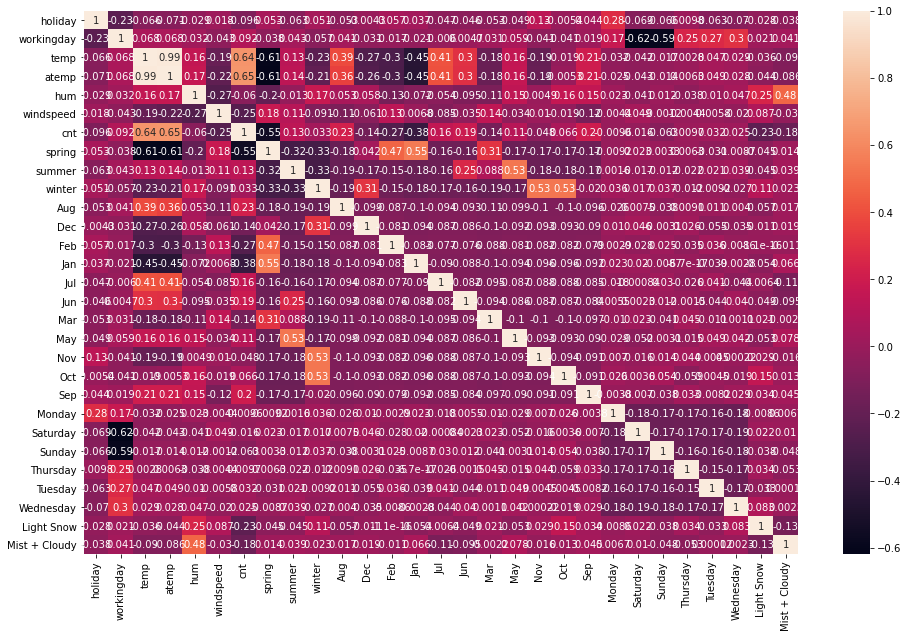

In [252]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(day_train.corr(), annot = True)
plt.show()

### Dividing into X and Y sets for the model building

In [253]:
y_train = day_train.pop('cnt')
X_train = day_train

In [254]:
X_train.head()

holiday  workingday      temp     atemp       hum  windspeed  spring  \
653        0           1  0.509887  0.501133  0.575354   0.300794       0   
576        0           1  0.815169  0.766351  0.725633   0.264686       0   
426        0           0  0.442393  0.438975  0.640189   0.255342       1   
728        0           0  0.245101  0.200348  0.498067   0.663106       1   
482        0           0  0.395666  0.391735  0.504508   0.188475       0   

     summer  winter  Aug  ...  Oct  Sep  Monday  Saturday  Sunday  Thursday  \
653       0       1    0  ...    1    0       0         0       0         0   
576       0       0    0  ...    0    0       0         0       0         0   
426       0       0    0  ...    0    0       0         1       0         0   
728       0       0    0  ...    0    0       0         0       1         0   
482       1       0    0  ...    0    0       0         1       0         0   

     Tuesday  Wednesday  Light Snow  Mist + Cloudy  
653        1          0           0              0  
576        1          0           0              0  
426        0          0           0              1  
728        0          0           0              0  
482        0          0           0              1  

[5 rows x 28 columns]

## Model Building

### Adding all the variables to the model

In [255]:
# Check all the columns of the dataframe

X_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [256]:
def call_OLS_Summay(y, X):
    X_train_lm = sm.add_constant(X)
    lm = sm.OLS(y, X_train_lm).fit()

    print(lm.params)
    print(lm.summary())    
    return X_train_lm, lm;

In [257]:
X_train_lm, lm = call_OLS_Summay(y_train, X_train)

const            0.301036
holiday          0.000296
workingday       0.116139
temp             0.755756
atemp           -0.073276
hum             -0.284020
windspeed       -0.202750
spring          -0.026232
summer           0.057829
winter           0.149209
Aug             -0.033468
Dec             -0.051246
Feb             -0.015624
Jan             -0.023590
Jul             -0.116266
Jun             -0.078070
Mar             -0.002660
May             -0.030452
Nov             -0.060639
Oct             -0.034956
Sep              0.038821
Monday           0.005456
Saturday         0.113761
Sunday           0.070840
Thursday        -0.005125
Tuesday         -0.014983
Wednesday        0.001289
Light Snow      -0.259788
Mist + Cloudy   -0.043167
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [258]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def check_VIF_Values(X_df): 
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
check_VIF_Values(X_train)

         Features    VIF
1      workingday  85.30
2            temp  66.62
3           atemp  56.04
21       Saturday  19.65
22         Sunday  18.27
6          spring  10.79
8          winter   9.49
7          summer   8.31
17            Nov   6.79
18            Oct   6.58
9             Aug   6.53
12            Jan   5.89
10            Dec   5.68
13            Jul   5.67
19            Sep   4.95
0         holiday   4.51
11            Feb   4.39
15            Mar   3.47
14            Jun   2.85
16            May   2.22
4             hum   2.03
20         Monday   1.98
25      Wednesday   1.94
23       Thursday   1.83
24        Tuesday   1.80
27  Mist + Cloudy   1.60
5       windspeed   1.30
26     Light Snow   1.30


## RFE(Recursive Feature Elimination)

In [259]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

### First **15** variables in RFE for Feature Selection

In [260]:
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [261]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 10),
 ('Jan', False, 9),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 12),
 ('May', True, 1),
 ('Nov', False, 2),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Monday', False, 13),
 ('Saturday', True, 1),
 ('Sunday', False, 5),
 ('Thursday', False, 11),
 ('Tuesday', False, 8),
 ('Wednesday', False, 14),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [262]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'Jul', 'Jun', 'May', 'Sep', 'Saturday', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [263]:
col = X_train.columns[~rfe.support_]
col

Index(['spring', 'Aug', 'Dec', 'Feb', 'Jan', 'Mar', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [264]:
X = X_train.drop(col, 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.325076
holiday         -0.073741
workingday       0.042490
temp             0.781547
atemp           -0.071590
hum             -0.293876
windspeed       -0.202538
summer           0.091627
winter           0.142299
Jul             -0.087808
Jun             -0.067036
May             -0.029405
Sep              0.074681
Saturday         0.041830
Light Snow      -0.252202
Mist + Cloudy   -0.041282
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     49.03
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.16e-87
Time:                        20:12:13   Log-Likelihood:                 271.03
No. Observations:                 510   AIC:                            -510.1
Df Residuals:   

## Dropping highly correlated variables and insignificant variables:
- P-Value : **atemp - 0.744**
- VIF :  **atemp - 361.01**

We are taking **High P-Value & High VIF value** - ***atemp*** for dropping from X train dataframe

In [265]:
X = X.drop('atemp', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.324203
holiday         -0.073210
workingday       0.042535
temp             0.715324
hum             -0.295083
windspeed       -0.200073
summer           0.090618
winter           0.141447
Jul             -0.088091
Jun             -0.066610
May             -0.029140
Sep              0.074534
Saturday         0.041874
Light Snow      -0.251090
Mist + Cloudy   -0.041057
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     52.62
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.66e-88
Time:                        20:12:14   Log-Likelihood:                 270.97
No. Observations:                 510   AIC:                            -511.9
Df Residuals:                     495   BI

#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : **May - 0.325**
- **VIF**     :  **hum - 17.17**

We are taking **High VIF(>5)** - ***hum*** for dropping from X train dataframe

In [266]:
X = X.drop('hum', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.155107
holiday         -0.069450
workingday       0.048661
temp             0.668380
windspeed       -0.144334
summer           0.092548
winter           0.127264
Jul             -0.073642
Jun             -0.053429
May             -0.044683
Sep              0.068708
Saturday         0.050286
Light Snow      -0.333070
Mist + Cloudy   -0.087264
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     52.48
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.82e-84
Time:                        20:12:14   Log-Likelihood:                 259.13
No. Observations:                 510   AIC:                            -490.3
Df Residuals:                     496   BIC:                        

In [267]:
X = X.drop('May', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.158152
holiday         -0.068092
workingday       0.048927
temp             0.654932
windspeed       -0.138370
summer           0.076895
winter           0.127931
Jul             -0.066981
Jun             -0.038132
Sep              0.073219
Saturday         0.051494
Light Snow      -0.331689
Mist + Cloudy   -0.088093
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     56.53
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           6.99e-85
Time:                        20:12:14   Log-Likelihood:                 258.00
No. Observations:                 510   AIC:                            -490.0
Df Residuals:                     497   BIC:                            -434.9
Df Model:      

#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : **May - 0.138**
- **VIF**     :  **temp - 7.07**

We are taking **High VIF(>5)** - ***temp*** for dropping from X train dataframe

In [270]:
X = X.drop('temp', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.490659
workingday       0.074866
windspeed       -0.264765
summer           0.152474
winter           0.100569
Jul              0.183120
Sep              0.218709
Saturday         0.063285
Light Snow      -0.344653
Mist + Cloudy   -0.106146
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     23.24
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           3.56e-33
Time:                        20:33:35   Log-Likelihood:                 127.64
No. Observations:                 510   AIC:                            -235.3
Df Residuals:                     500   BIC:                            -192.9
Df Model:                           9                                         
Covariance Typ

#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : ***holiday - 0.077***
- **VIF**     :  There is no VIF variables ***>5***

We are taking **High P-Value(>0.05)** - ***holiday*** for dropping from X train dataframe

In [268]:
X = X.drop('holiday', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.147050
workingday       0.059058
temp             0.656323
windspeed       -0.139457
summer           0.077851
winter           0.127777
Jul             -0.065252
Jun             -0.037060
Sep              0.071325
Saturday         0.061707
Light Snow      -0.330209
Mist + Cloudy   -0.087415
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     61.30
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           2.72e-85
Time:                        20:23:32   Log-Likelihood:                 256.81
No. Observations:                 510   AIC:                            -489.6
Df Residuals:                     498   BIC:                            -438.8
Df Model:                          11    

#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : ***Jul - 0.683***
- **VIF**     :  There is no VIF variables ***>5***

We are taking **High P-Value(>0.05)** - ***Jul*** for dropping from X train dataframe

In [269]:
X = X.drop('Jun', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.151304
workingday       0.059484
temp             0.638732
windspeed       -0.138075
summer           0.075363
winter           0.129561
Jul             -0.055269
Sep              0.077497
Saturday         0.061403
Light Snow      -0.328754
Mist + Cloudy   -0.085622
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     67.15
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           7.59e-86
Time:                        20:24:26   Log-Likelihood:                 255.92
No. Observations:                 510   AIC:                            -489.8
Df Residuals:                     499   BIC:                            -443.3
Df Model:                          10                              

In [55]:
X.columns.size

11

### No. of independent Variables Should be <= 10. But we have 11 variables now
#### Dropping next highly correlated variables and insignificant variables
- **P-Value** : ***summer - 0.005***
- **VIF**     :  ***windspeed - 4.04***

We are taking **High VIF** still it's < 0.05 - ***windspeed*** for dropping from X train dataframe

In [56]:
X = X.drop('windspeed', 1)
X_train_lm, lm = call_OLS_Summay(y_train, X)
check_VIF_Values(X)

const            0.099680
workingday       0.061521
atemp            0.670621
summer           0.083768
winter           0.130953
Jun             -0.018641
May             -0.020194
Sep              0.093475
Saturday         0.059626
Light Snow      -0.336480
Mist + Cloudy   -0.083354
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     62.06
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           4.33e-81
Time:                        18:29:22   Log-Likelihood:                 244.59
No. Observations:                 510   AIC:                            -467.2
Df Residuals:                     499   BIC:                            -420.6
Df Model:                          10                              

In [57]:
X.columns.size

10

In [58]:
X.corr()

workingday     atemp    summer    winter       Jun       May  \
workingday       1.000000  0.067811  0.043274 -0.057297  0.004694  0.059006   
atemp            0.067811  1.000000  0.135806 -0.211118  0.295173  0.161923   
summer           0.043274  0.135806  1.000000 -0.328116  0.254937  0.532539   
winter          -0.057297 -0.211118 -0.328116  1.000000 -0.163389 -0.174734   
Jun              0.004694  0.295173  0.254937 -0.163389  1.000000 -0.086099   
May              0.059006  0.161923  0.532539 -0.174734 -0.086099  1.000000   
Sep              0.019495  0.206157 -0.168473 -0.020175 -0.083893 -0.089718   
Saturday        -0.619074 -0.043452 -0.017169  0.016635  0.002347 -0.051896   
Light Snow       0.021159 -0.044266 -0.045231  0.114448 -0.049393 -0.052822   
Mist + Cloudy    0.040766 -0.086069  0.039442  0.023127 -0.094983  0.077963   

                    Sep  Saturday  Light Snow  Mist + Cloudy  
workingday     0.019495 -0.619074    0.021159       0.040766  
atemp          0.206157 -0.043452   -0.044266      -0.086069  
summer        -0.168473 -0.017169   -0.045231       0.039442  
winter        -0.020175  0.016635    0.114448       0.023127  
Jun           -0.083893  0.002347   -0.049393      -0.094983  
May           -0.089718 -0.051896   -0.052822       0.077963  
Sep            1.000000 -0.006996    0.033894       0.044527  
Saturday      -0.006996  1.000000    0.021698       0.010184  
Light Snow     0.033894  0.021698    1.000000      -0.125817  
Mist + Cloudy  0.044527  0.010184   -0.125817       1.000000

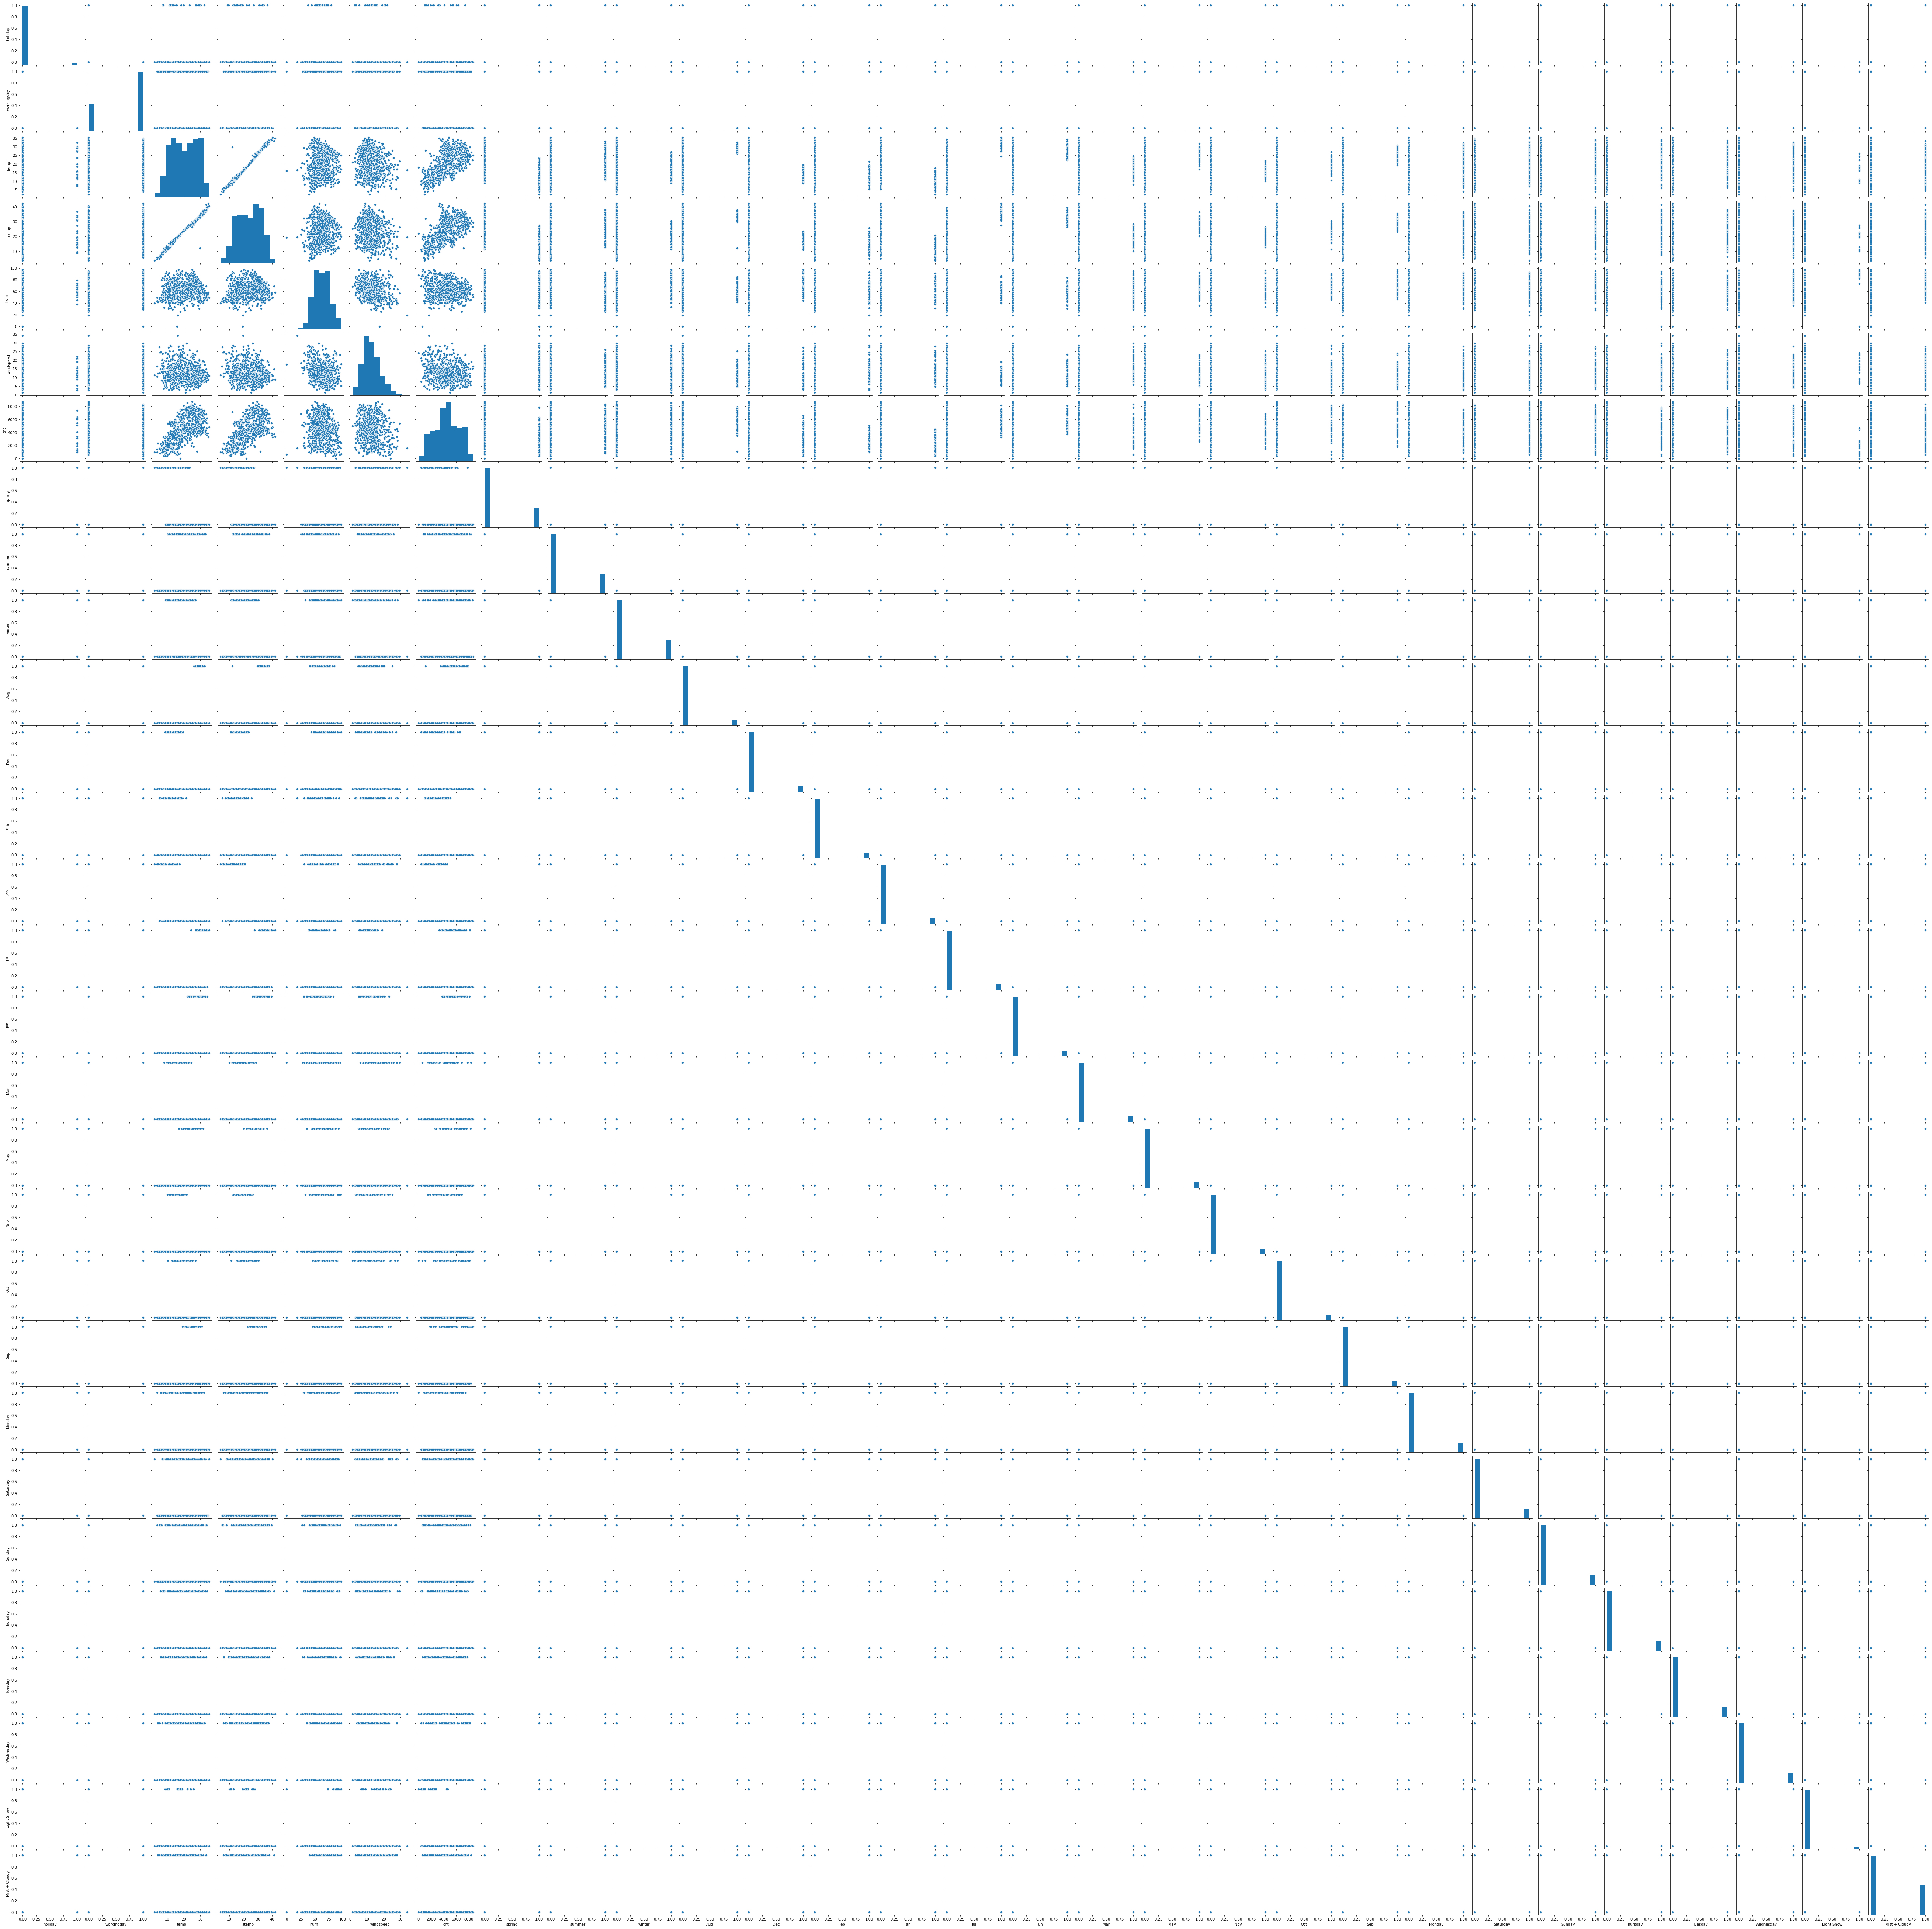

In [59]:
sns.pairplot(day)
plt.show()

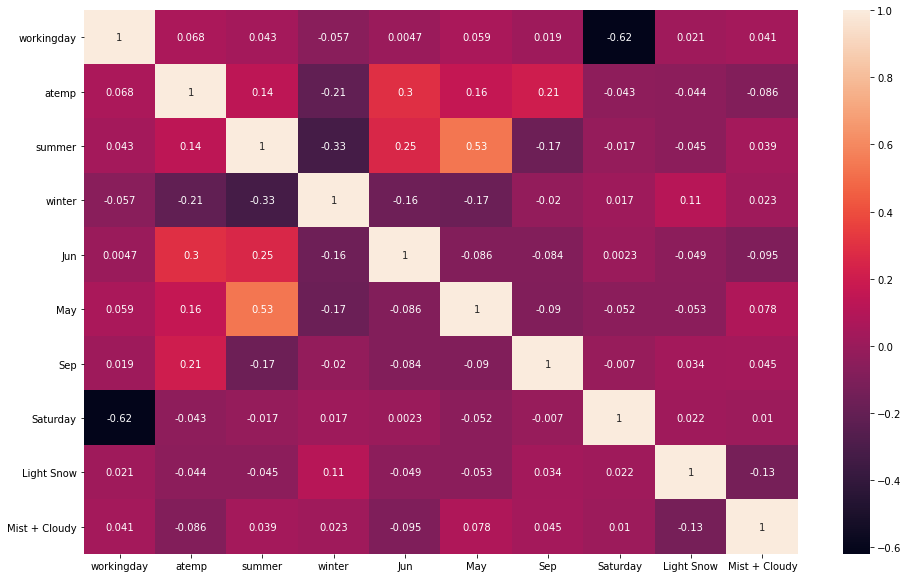

In [60]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(X.corr(), annot = True)
plt.show()

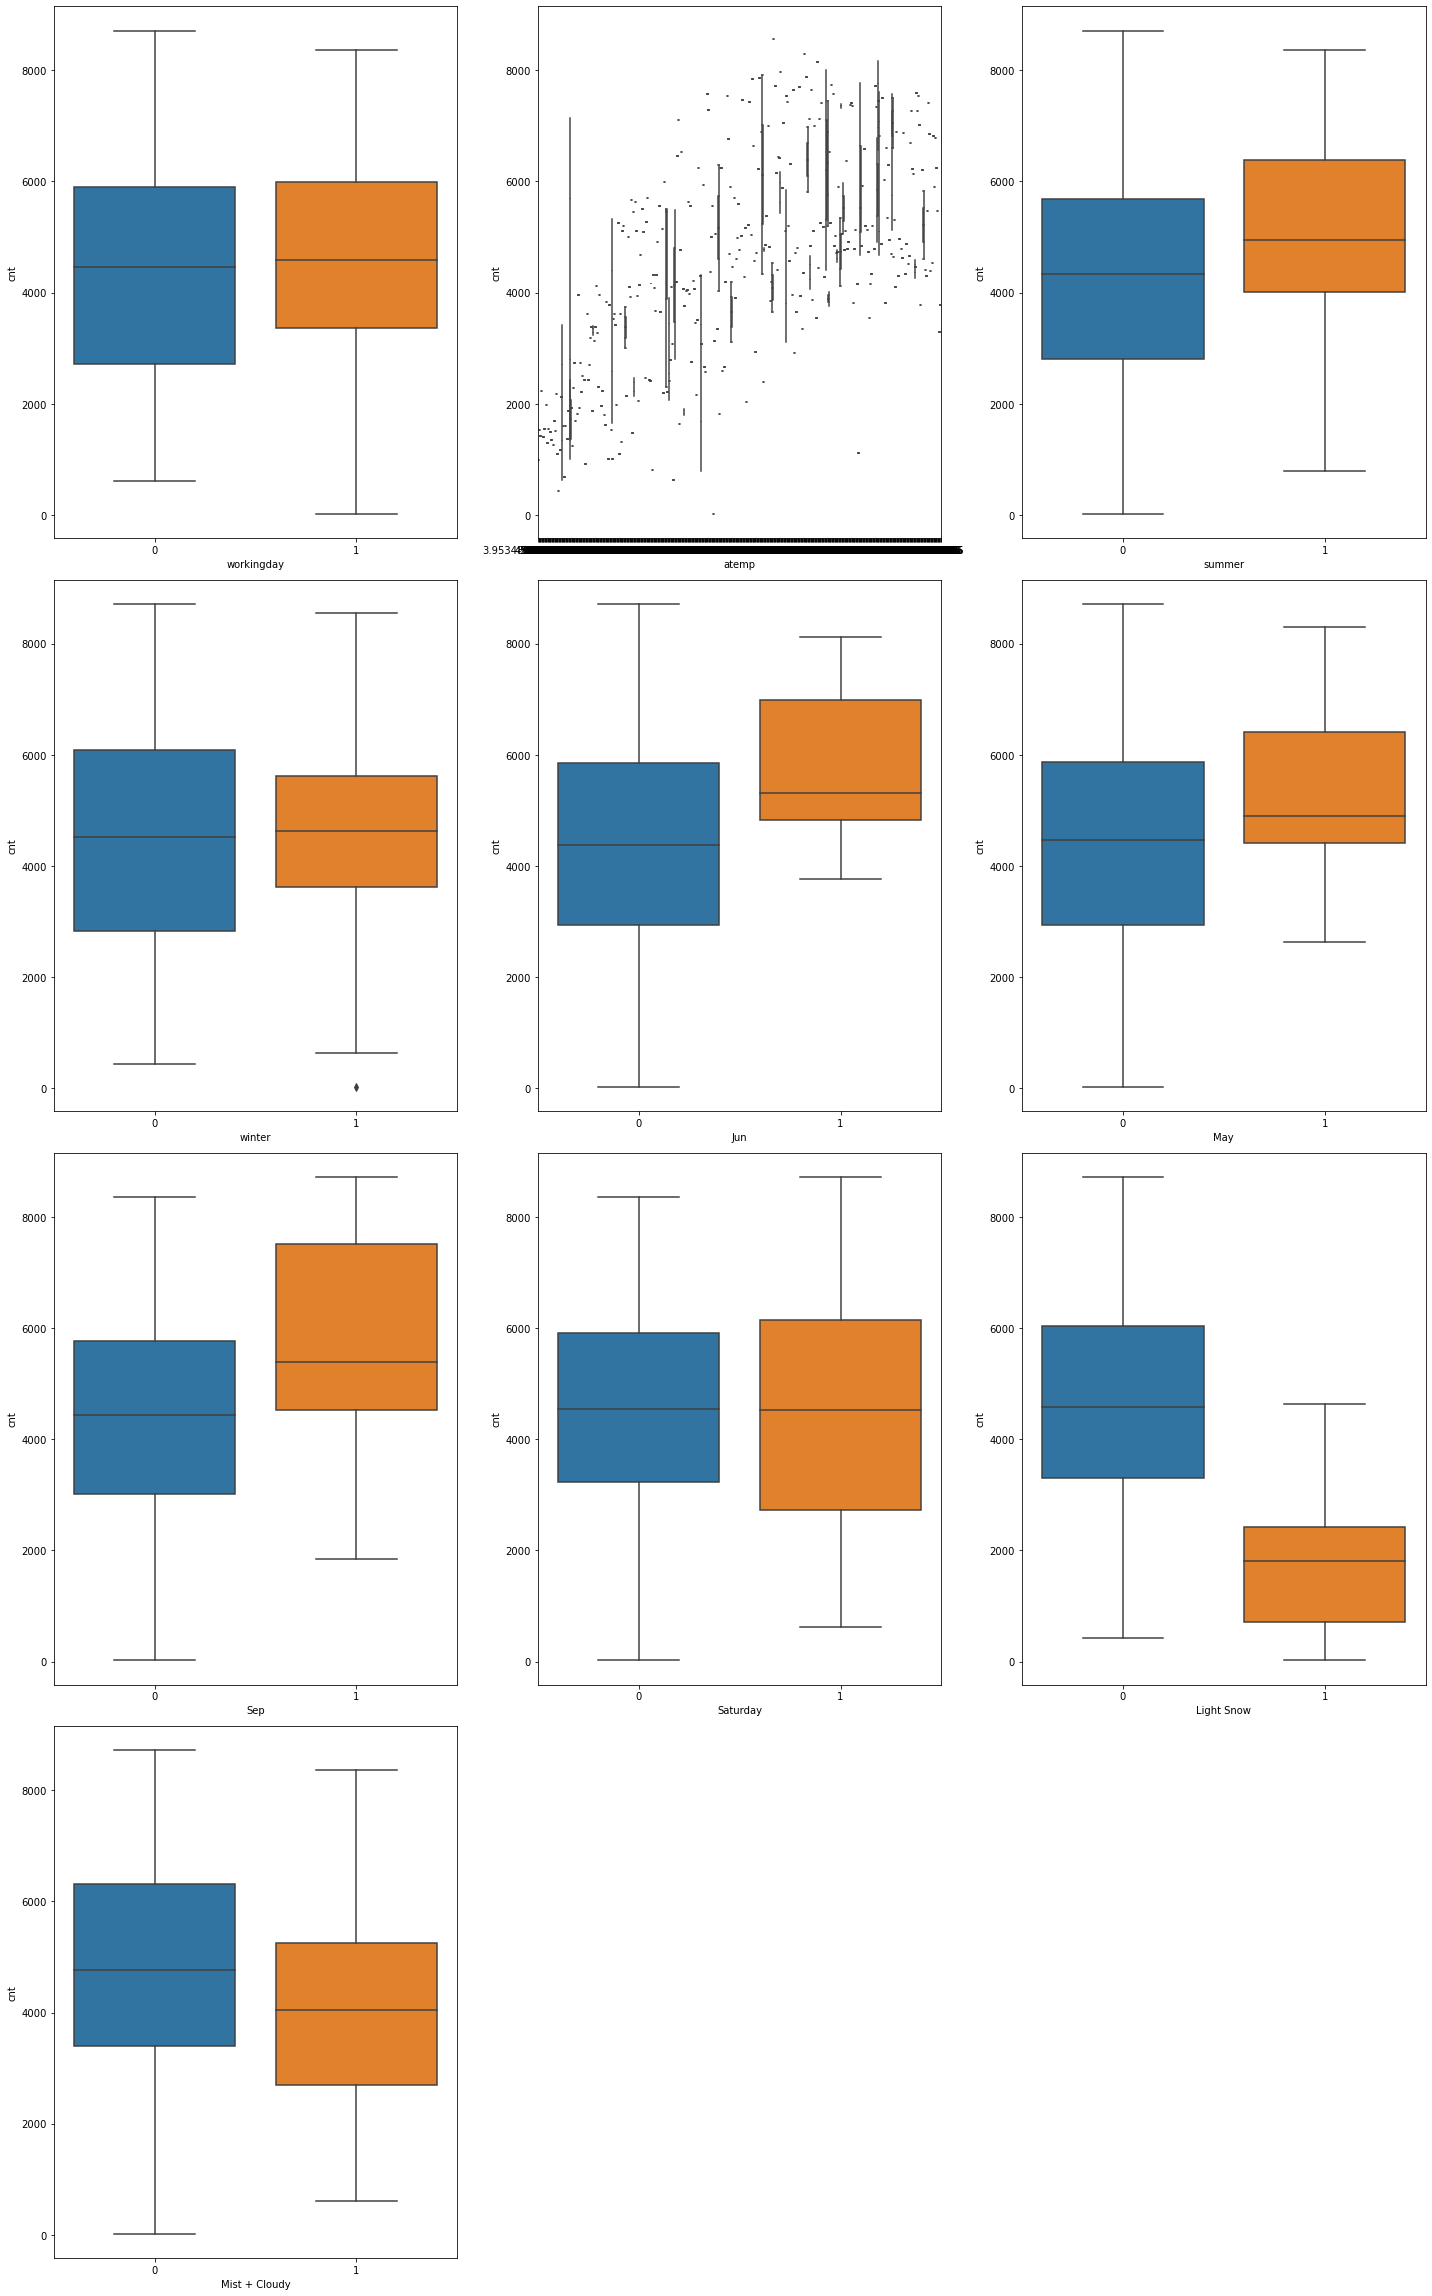

In [61]:
darwPlots(day, X.columns)

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_pred = lm.predict(X_train_lm)

Text(0, 0.5, 'y_train_pred')

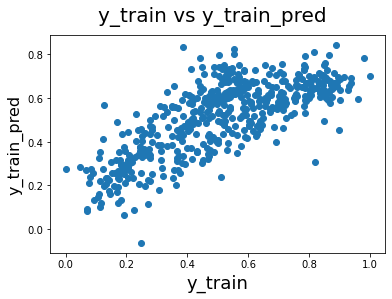

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16) 

Text(0.5, 0, 'Errors')

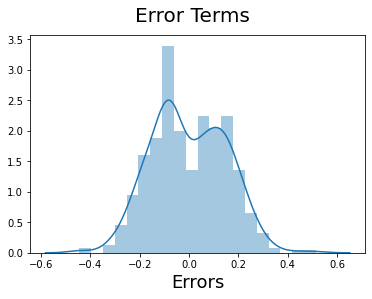

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### Applying the scaling on the test sets

In [65]:
day_test[num_vars] = scaler.transform(day_test[num_vars])

day_test.head()

holiday  workingday      temp     atemp       hum  windspeed       cnt  \
184        1           0  0.831783  0.769660  0.657364   0.084219  0.692706   
535        0           1  0.901354  0.842587  0.610133   0.153728  0.712034   
299        0           1  0.511964  0.496145  0.837699   0.334206  0.303382   
221        0           1  0.881625  0.795343  0.437098   0.339570  0.547400   
152        0           1  0.817246  0.741471  0.314298   0.537414  0.569029   

     spring  summer  winter  ...  Oct  Sep  Monday  Saturday  Sunday  \
184       0       0       0  ...    0    0       1         0       0   
535       0       1       0  ...    0    0       0         0       0   
299       0       0       1  ...    1    0       0         0       0   
221       0       0       0  ...    0    0       0         0       0   
152       0       1       0  ...    0    0       0         0       0   

     Thursday  Tuesday  Wednesday  Light Snow  Mist + Cloudy  
184         0        0          0           0              1  
535         0        0          1           0              0  
299         1        0          0           0              1  
221         0        0          1           0              0  
152         1        0          0           0              0  

[5 rows x 29 columns]

In [66]:
day_test.describe()

holiday  workingday        temp       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.036530    0.698630    0.558941    0.532991    0.638508    0.313350   
std      0.188034    0.459904    0.233698    0.217888    0.148974    0.159947   
min      0.000000    0.000000    0.046591    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.354650    0.344751    0.527265    0.198517   
50%      0.000000    1.000000    0.558691    0.549198    0.627737    0.299459   
75%      0.000000    1.000000    0.759096    0.714132    0.743928    0.403048   
max      1.000000    1.000000    0.984424    0.980934    1.002146    0.807474   

              cnt      spring      summer      winter  ...         Oct  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.520592    0.255708    0.264840    0.232877  ...    0.082192   
std      0.218435    0.437258    0.442259    0.423633  ...    0.275286   
min      0.048205    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.377531    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.524275    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.672745    1.000000    1.000000    0.000000  ...    0.000000   
max      0.963300    1.000000    1.000000    1.000000  ...    1.000000   

              Sep      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.127854    0.118721    0.146119    0.164384    0.164384   
std      0.282125    0.334692    0.324202    0.354034    0.371472    0.371472   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday  Light Snow  Mist + Cloudy  
count  219.000000  219.000000     219.000000  
mean     0.100457    0.027397       0.319635  
std      0.301297    0.163612       0.467403  
min      0.000000    0.000000       0.000000  
25%      0.000000    0.000000       0.000000  
50%      0.000000    0.000000       0.000000  
75%      0.000000    0.000000       1.000000  
max      1.000000    1.000000       1.000000  

[8 rows x 29 columns]

### Dividing into X_test and y_test

In [67]:
y_test = day_test.pop('cnt')
X_test = day_test

In [68]:
# Creating day_test dataframe by dropping variables from day_test

X_test = X_test[X.columns]

In [69]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [70]:
# Making predictions using the fourth model

y_test_pred = lm.predict(X_test_lm)

## Model Evaluation:

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

NameError: name 'y_pred' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
lm.params

In [ ]:
lm.summary()

### R-squared value for train data

In [ ]:
r2_score(y_true=y_train, y_pred=y_train_pred)

### R-squared value for test data

In [ ]:
r2_score(y_true=y_test, y_pred=y_test_pred)

### We can see that the equation of our best fitted line is:

### $ cnt = 0.247  \times  yr + 0.058  \times  workingday - 0.2828 \times spring - 0.0563 \times summer - 0.0766 \times winter - 0.0888 \times Jan + 0.0764 \times Sep + 0.062 \times Saturday - 0.3219 \times Light Snow - 0.0874 \times Mist + Cloudy $


## Overall we have a decent model, but we also acknowledge that we could do better. 
